**Name : Ramya Krishnan**

**(a) Download Data**

Package imports

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics

from scipy.io import arff
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate

Get the Vertebral Column Data Set

In [53]:
data = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [54]:
df['class'] = df['class'].apply(lambda x: x.decode("utf-8") if isinstance(x, (bytes, bytearray)) else x)

df['class'] = df['class'].replace({"Normal": 0, "Abnormal": 1, "NO": 0, "AB": 1})

df.head()


/var/folders/ms/46gdhwln65vgd02n8gls4rfc0000gn/T/ipykernel_26015/148966118.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({"Normal": 0, "Abnormal": 1, "NO": 0, "AB": 1})


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


**(b) Pre-Processing and Exploratory Data Analysis**
i. Scatterplots

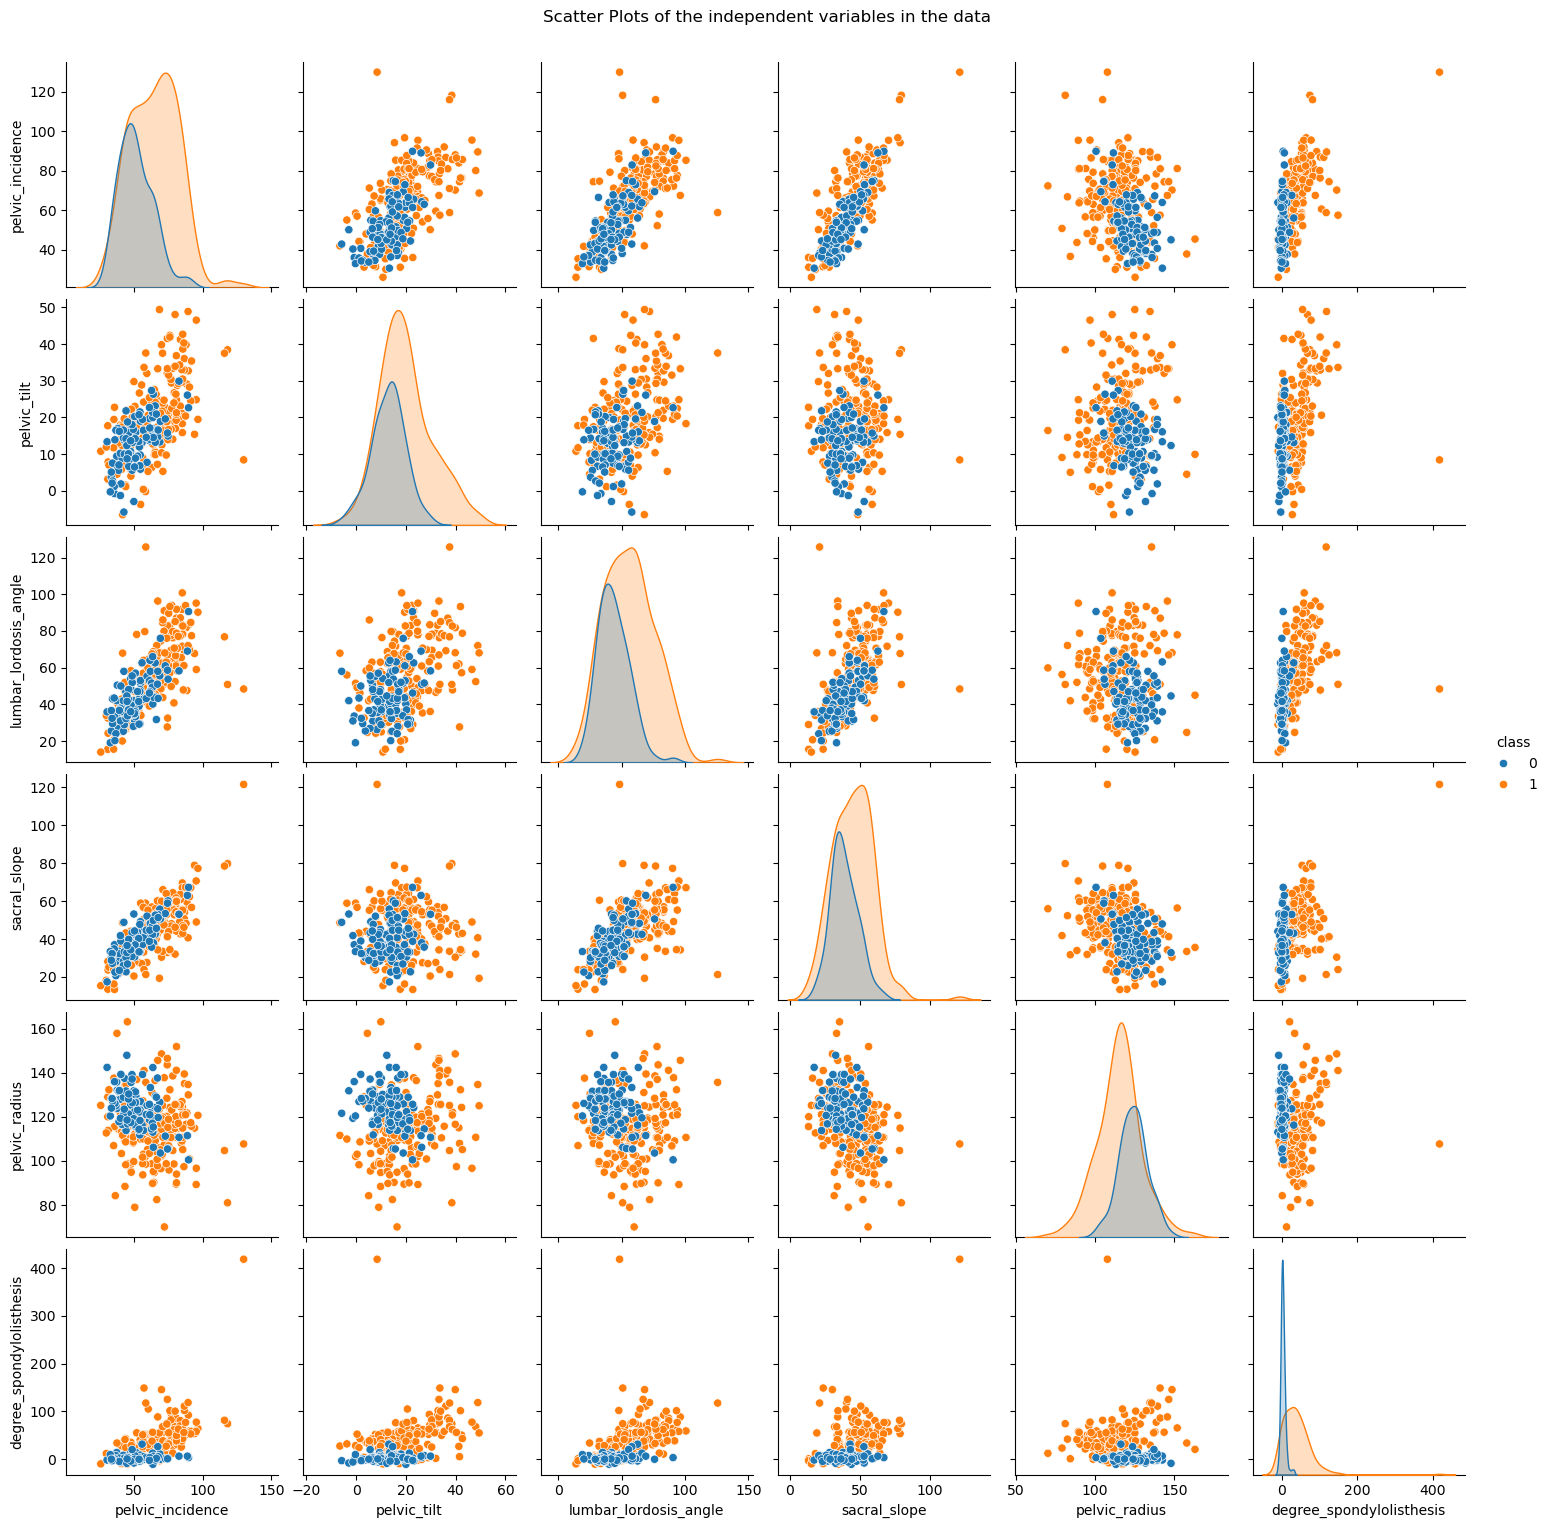

In [55]:
g = sns.pairplot(data=df, hue='class')  

g.fig.suptitle("Scatter Plots of the independent variables in the data", y=1.02)

plt.show()

ii.Box Plot

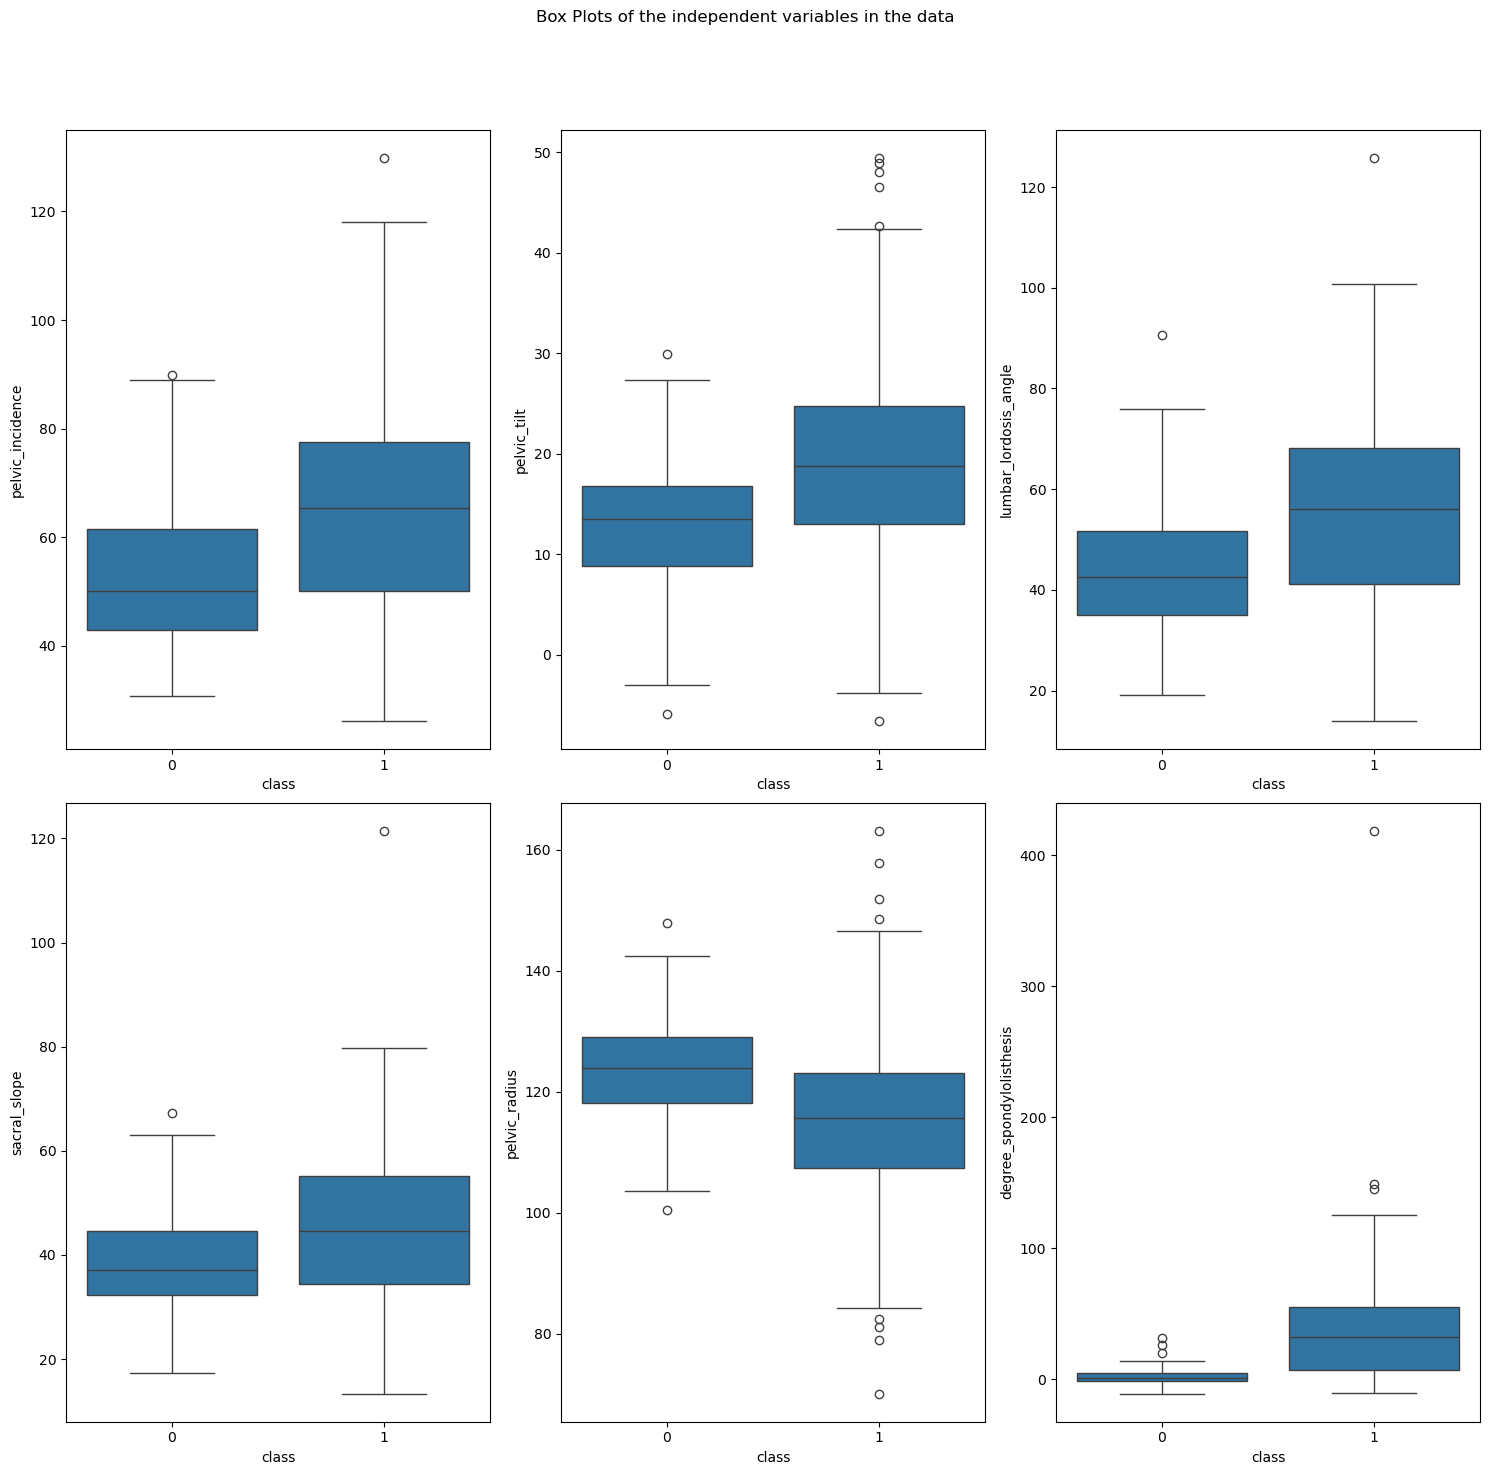

In [56]:
fig, ax = plt.subplots(2, 3, figsize=(15, 15))
fig.suptitle('Box Plots of the independent variables in the data')

# Loop through the grid positions
for i in range(0, 2):
    for j in range(0, 3):
        # Calculate the column index
        col_idx = i * 3 + j
        
        # Check if the column index is valid (to avoid IndexError)
        if col_idx < df.shape[1] - 1:  # -1 to exclude the 'class' column
            # Get the column name for better labeling
            col_name = df.columns[col_idx]
            
            # Create boxplot with column name as the y-axis label
            sns.boxplot(x='class', y=df.iloc[:, col_idx], ax=ax[i, j], data=df)
            ax[i, j].set_ylabel(col_name)
        else:
            # Hide axes if there are no more columns to plot
            ax[i, j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust to make room for the suptitle
plt.show()

iii.  Split and train the dataset

In [57]:
train_0 = df.loc[df['class']==0][:70] 
test_0 = df.loc[df['class']==0][70:]   

train_1 = df.loc[df['class']==1][:140] 
test_1 = df.loc[df['class']==1][140:]  

train_df = pd.concat([train_0, train_1]) 
test_df = pd.concat([test_0, test_1])    

x_train = train_df.iloc[:,:-1] 
y_train = train_df.iloc[:,-1]   
x_test = test_df.iloc[:,:-1]   
y_test = test_df.iloc[:,-1]    

In [58]:
print(x_train)

print(x_train.head())

print("Shape of x_train:", x_train.shape)



     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
210         38.505273    16.964297              35.112814     21.540976   
211         54.920858    18.968430              51.601455     35.952428   
212         44.362490     8.945435              46.902096     35.417055   
213         48.318931    17.452121              48.000000     30.866809   
214         45.701789    10.659859              42.577846     35.041929   
..                ...          ...                    ...           ...   
135         77.121344    30.349874              77.481083     46.771470   
136         88.024499    39.844669              81.774473     48.179830   
137         83.396606    34.310989              78.423293     49.085617   
138         72.054034    24.700737              79.874016     47.353297   
139         85.095503    21.069897              91.734792     64.025606   

     pelvic_radius  degree_spondylolisthesis  
210     127.632875                  7.986683  
211  

**(c) Classification**

In [59]:
# Globals to track training error minima across calls
BEST_TR_ERR = float("inf")
BEST_TR_ERR_NO_K1 = float("inf")

results_map = {}

In [60]:
# i) Euclidean distance quick check
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

knn_euc = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_euc.fit(x_train, y_train)
acc = knn_euc.score(x_test, y_test)
print("kNN (Euclidean) accuracy:", acc)

kNN (Euclidean) accuracy: 0.9


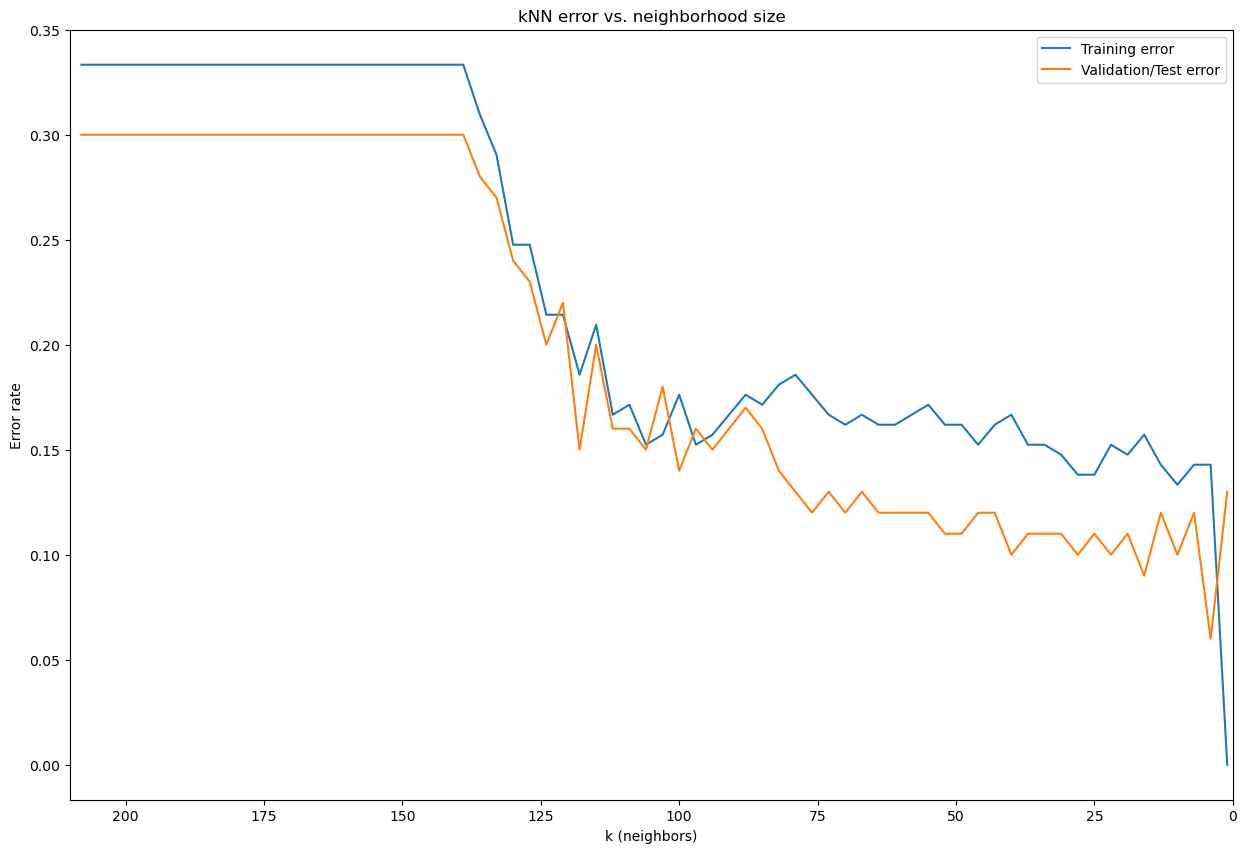

╒══════════╤═════════════╤════════════════════╤═══════════════╤════════════════╤═════════════╤══════════╕
│   Best k │   Min error │ Confusion matrix   │   TNR (spec.) │   TPR (recall) │   Precision │       F1 │
╞══════════╪═════════════╪════════════════════╪═══════════════╪════════════════╪═════════════╪══════════╡
│        4 │        0.06 │ [[25  5]           │      0.833333 │       0.985714 │    0.932432 │ 0.958333 │
│          │             │  [ 1 69]]          │               │                │             │          │
╘══════════╧═════════════╧════════════════════╧═══════════════╧════════════════╧═════════════╧══════════╛


In [61]:
# ii) Evaluation on a grid of k
def run_knn_sweep(
    k_vals,
    X_tr,
    y_tr,
    X_te,
    y_te,
    dist="euclidean",
    p_norm=2,
    wts="uniform",
):
    """
    Sweep over candidate k values and track train/test errors.
    Returns:
        min_te_err_list, best_k_list, train_errs, test_errs
        (lists to support ties)
    """
    global BEST_TR_ERR, BEST_TR_ERR_NO_K1

    min_te_err_list = [1.0]
    best_k_list = [-1]

    train_errs = []
    test_errs = []

    # Precompute covariance inverse if using Mahalanobis
    cov_inv = None
    if dist == "mahalanobis":
        cov_inv = np.linalg.inv(np.cov(X_tr.T))

    for k in k_vals:
        if dist == "mahalanobis":
            clf = KNeighborsClassifier(
                n_neighbors=k, metric="mahalanobis", metric_params={"VI": cov_inv}, weights=wts
            )
        else:
            clf = KNeighborsClassifier(n_neighbors=k, metric=dist, p=p_norm, weights=wts)

        clf.fit(X_tr, y_tr)

        tr_err = 1.0 - clf.score(X_tr, y_tr)
        te_err = 1.0 - clf.score(X_te, y_te)

        # Track global training-error bests (with/without k=1)
        if k != 1 and tr_err < BEST_TR_ERR_NO_K1:
            BEST_TR_ERR_NO_K1 = tr_err
        if tr_err < BEST_TR_ERR:
            BEST_TR_ERR = tr_err

        train_errs.append(tr_err)
        test_errs.append(te_err)

        # Keep all k that tie for best test error
        if te_err < min_te_err_list[0]:
            min_te_err_list = [te_err]
            best_k_list = [k]
        elif te_err == min_te_err_list[0]:
            min_te_err_list.append(te_err)
            best_k_list.append(k)

    return min_te_err_list, best_k_list, train_errs, test_errs


# Plot Train/Test error vs K
k_vals = np.arange(1, 209, 3)
best_errs, best_ks, tr_errs, te_errs = run_knn_sweep(k_vals, x_train, y_train, x_test, y_test)
results_map["euclidean"] = [[best_ks[i], best_errs[i]] for i in range(len(best_ks))]

plt.figure(figsize=(15, 10))
plt.plot(k_vals, tr_errs, label="Training error")
plt.plot(k_vals, te_errs, label="Validation/Test error")
plt.xlabel("k (neighbors)")
plt.ylabel("Error rate")
plt.title("kNN error vs. neighborhood size")
plt.legend()
plt.xlim(210, 0)  # descend visually from large k to small k
plt.show()


# Use the best k to compute metrics
best_k_euclid = results_map["euclidean"][0][0]
final_knn = KNeighborsClassifier(n_neighbors=best_k_euclid, metric="euclidean")
final_knn.fit(x_train, y_train)
y_hat = final_knn.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_hat)
prec = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) else 0.0
tnr = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) else 0.0  # specificity
tpr = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) else 0.0  # recall/sensitivity
f1 = (2 * prec * tpr) / (prec + tpr) if (prec + tpr) else 0.0

print(
    tabulate(
        [[best_k_euclid, best_errs[0], cm, tnr, tpr, prec, f1]],
        headers=[
            "Best k",
            "Min error",
            "Confusion matrix",
            "TNR (spec.)",
            "TPR (recall)",
            "Precision",
            "F1",
        ],
        tablefmt="fancy_grid",
    )
)

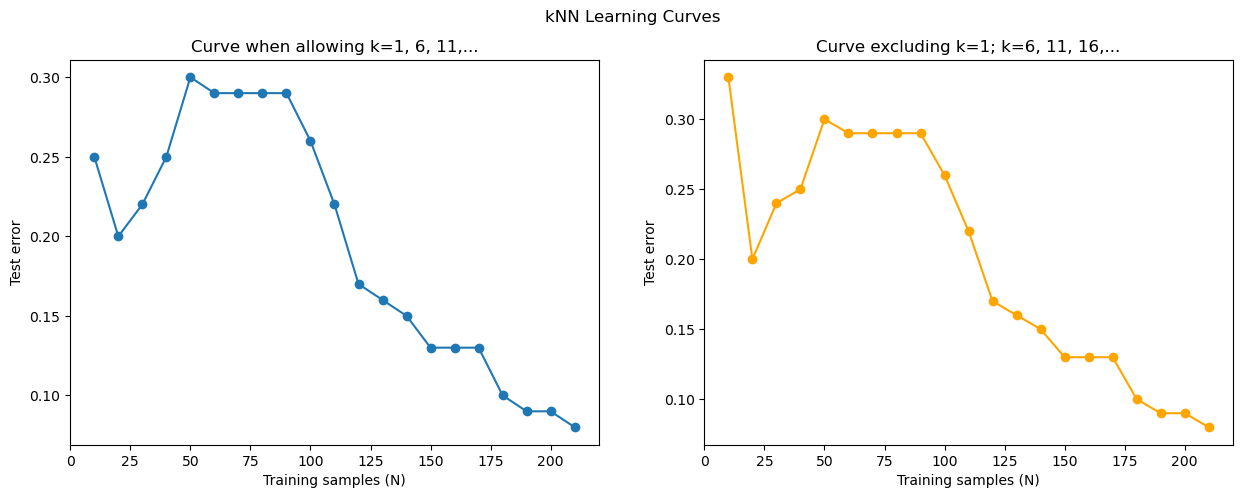

In [62]:
# iii) Learning curves (vary training size)
from sklearn.neighbors import KNeighborsClassifier

def knn_learning_curve(n_values, data_df, X_test, y_test):
    """
    Make learning curves for kNN by training on growing subsets.

    Returns:
        err_excl1, bestk_excl1, err_incl1, bestk_incl1
    """
    err_excl1, bestk_excl1 = [], []
    err_incl1, bestk_incl1 = [], []

    # --- make test arrays consistent (NumPy) to avoid feature-name warnings ---
    X_test = X_test.to_numpy() if hasattr(X_test, "to_numpy") else X_test
    y_test = y_test.to_numpy() if hasattr(y_test, "to_numpy") else y_test

    for size in n_values:
        # roughly balance classes: ~1/3 zeros, ~2/3 ones (adjust to your data)
        n0 = size // 3
        n1 = size - n0
        sub0 = data_df.loc[data_df["class"] == 0].head(n0)
        sub1 = data_df.loc[data_df["class"] == 1].head(n1)
        sub_df = pd.concat([sub0, sub1], ignore_index=True)

        # if too small to train, append NaNs and continue
        m = len(sub_df)
        if m < 3:
            err_excl1.append(np.nan); bestk_excl1.append(np.nan)
            err_incl1.append(np.nan); bestk_incl1.append(np.nan)
            continue

        # shuffle subset for stability
        sub_df = sub_df.sample(frac=1.0, random_state=42).reset_index(drop=True)

        # features/labels; coerce to NumPy to keep types consistent
        X_sub = sub_df.iloc[:, :-1].to_numpy()
        y_sub = sub_df.iloc[:, -1].to_numpy()

        # cap k so it never exceeds #train - 1
        max_k = max(1, m - 1)
        k_cap = min(size, max_k)

        # ---- sweep INCLUDING k = 1 ----
        ks_with1 = np.arange(1, k_cap + 1, 5)
        if ks_with1.size > 0:
            min_err1, bestk1, _, _ = run_knn_sweep(ks_with1, X_sub, y_sub, X_test, y_test)
            err_incl1.append(min_err1[0])
            bestk_incl1.append(bestk1[0])
        else:
            err_incl1.append(np.nan); bestk_incl1.append(np.nan)

        # ---- sweep EXCLUDING k = 1 ----
        start_k = 6 if k_cap >= 6 else 2  # exclude 1 but still allow small sets
        ks_no1 = np.arange(start_k, k_cap + 1, 5) if start_k <= k_cap else np.array([], dtype=int)
        if ks_no1.size > 0:
            min_err2, bestk2, _, _ = run_knn_sweep(ks_no1, X_sub, y_sub, X_test, y_test)
            err_excl1.append(min_err2[0])
            bestk_excl1.append(bestk2[0])
        else:
            err_excl1.append(np.nan); bestk_excl1.append(np.nan)

    return err_excl1, bestk_excl1, err_incl1, bestk_incl1


# run curve experiment
train_sizes = np.arange(10, 211, 10)
err_no1, k_no1, err_with1, k_with1 = knn_learning_curve(train_sizes, df, x_test, y_test)

# visualize
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("kNN Learning Curves")

axs[0].set_xlabel("Training samples (N)")
axs[0].set_ylabel("Test error")
axs[0].plot(train_sizes, err_with1, marker="o")
axs[0].set_title("Curve when allowing k=1, 6, 11,...")

axs[1].set_xlabel("Training samples (N)")
axs[1].set_ylabel("Test error")
axs[1].plot(train_sizes, err_no1, marker="o", color="orange")
axs[1].set_title("Curve excluding k=1; k=6, 11, 16,...")

plt.show()


**(d) Extra**

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate

dist_summary = {}

# (optional) keep types consistent to avoid "feature names" warnings
Xtr = x_train.to_numpy() if hasattr(x_train, "to_numpy") else x_train
ytr = y_train.to_numpy() if hasattr(y_train, "to_numpy") else y_train
Xte = x_test.to_numpy()  if hasattr(x_test,  "to_numpy")  else x_test
yte = y_test.to_numpy()  if hasattr(y_test,  "to_numpy")  else y_test




In [64]:
# iA) Manhattan distance (Minkowski p=1)
k_grid = np.arange(1, 200, 5)
err_list, k_list, _, _ = run_knn_sweep(k_grid, Xtr, ytr, Xte, yte, dist="manhattan", p_norm=1)

# k=1 usually wins but overfits; take the next-best entry (index 1)
manhattan_pick = [[k_list[1], err_list[1]]]
dist_summary["Manhattan"] = manhattan_pick
print(tabulate(manhattan_pick, headers=["Selected k", "Test error"], tablefmt="fancy_grid"))

╒══════════════╤══════════════╕
│   Selected k │   Test error │
╞══════════════╪══════════════╡
│            6 │         0.11 │
╘══════════════╧══════════════╛


In [65]:
# iB) General Minkowski: scan log10(p) ∈ {0.1, 0.2, ..., 1.0} using k* from (iA)
def scan_minkowski_p(k_fixed, log10_values, Xtr, ytr, Xte, yte):
    best_score = -1.0
    best_logp = None
    for logp in log10_values:
        p_val = 10 ** logp
        clf = KNeighborsClassifier(n_neighbors=k_fixed, metric="minkowski", p=p_val)
        clf.fit(Xtr, ytr)
        sc = clf.score(Xte, yte)
        if sc > best_score:
            best_score = sc
            best_logp = logp
    return 1 - best_score, best_logp

log10_grid = np.arange(0.1, 1.1, 0.1)
fixed_k_for_p = manhattan_pick[0][0]
mink_err, mink_logp = scan_minkowski_p(fixed_k_for_p, log10_grid, Xtr, ytr, Xte, yte)
mink_row = [[fixed_k_for_p, round(mink_logp, 1), mink_err]]
dist_summary["Minkowski"] = mink_row
print(tabulate(mink_row, headers=["k (from Manhattan)", "best log10(p)", "Test error"], tablefmt="fancy_grid"))

╒══════════════════════╤═════════════════╤══════════════╕
│   k (from Manhattan) │   best log10(p) │   Test error │
╞══════════════════════╪═════════════════╪══════════════╡
│                    6 │             0.6 │         0.06 │
╘══════════════════════╧═════════════════╧══════════════╛


In [66]:
# iC) Chebyshev distance (Minkowski p → ∞)
k_grid = np.arange(1, 200, 5)
cheb_errs, cheb_ks, _, _ = run_knn_sweep(k_grid, Xtr, ytr, Xte, yte, dist="minkowski", p_norm=float("inf"))
cheb_pick = [[cheb_ks[0], cheb_errs[0]]]
dist_summary["Chebyshev"] = cheb_pick
print(tabulate(cheb_pick, headers=["Selected k", "Test error"], tablefmt="fancy_grid"))

╒══════════════╤══════════════╕
│   Selected k │   Test error │
╞══════════════╪══════════════╡
│           16 │         0.08 │
╘══════════════╧══════════════╛


ii) Mahalanobis distance


In [67]:
# ii) Mahalanobis distance  — choose best k but exclude k=1

# ---- Mahalanobis distance: pick best k > 1 safely ----
k_range = np.arange(1, 200, 5)
mah_errors, mah_ks, tr_curve, te_curve = run_knn_sweep(
    k_range, Xtr, ytr, Xte, yte, dist="mahalanobis"
)

# Compute best over all candidates with k > 1 using the full test-error curve
# (this avoids list-index issues when the best list is only [1])
k_gt1 = [k for k in k_range if k > 1]
err_gt1 = [e for e, k in zip(te_curve, k_range) if k > 1]

# Guard in case something odd leaves no k>1 (shouldn't happen with this k_range)
if len(k_gt1) == 0:
    k_star, err_star = k_range[0], te_curve[0]
else:
    best_idx = int(np.argmin(err_gt1))
    k_star, err_star = k_gt1[best_idx], err_gt1[best_idx]

# Store/print
results_dict = results_dict if 'results_dict' in globals() else {}
results_dict["Mahalanobis"] = [[k_star, err_star]]

print(
    tabulate(
        results_dict["Mahalanobis"],
        headers=["Selected k (>1)", "Test error"],
        tablefmt="fancy_grid"
    )
)


╒═══════════════════╤══════════════╕
│   Selected k (>1) │   Test error │
╞═══════════════════╪══════════════╡
│                 6 │         0.15 │
╘═══════════════════╧══════════════╛


**(e) Weighted Voting**

In [68]:
k_grid_weighted = np.arange(1, 200, 5)   # 1, 6, 11, ..., 196
weighted_results = {}

# helper to run, keep all ties for the best error
def run_weighted(metric_name, p_norm=None):
    kwargs = {"dist": metric_name, "wts": "distance"}
    if p_norm is not None:
        kwargs["p_norm"] = p_norm
    best_errs, best_ks, _, _ = run_knn_sweep(k_grid_weighted, Xtr, ytr, Xte, yte, **kwargs)
    # store as list of [k, error] rows (all ties)
    weighted_results[metric_name.capitalize() if metric_name != "minkowski" else "Chebyshev"] = [
        [k, e] for k, e in zip(best_ks, best_errs)
    ]

# Euclidean
run_weighted("euclidean")

# Manhattan (Minkowski p=1)
run_weighted("manhattan", p_norm=1)

# Chebyshev (Minkowski p → ∞)
run_weighted("minkowski", p_norm=float("inf"))

# pretty table
table_rows = []
for metric_label, rows in weighted_results.items():
    for j, (k_val, err_val) in enumerate(rows):
        label = metric_label if j == 0 else ""
        table_rows.append([label, k_val, err_val])

print(tabulate(table_rows,
               headers=["Distance metric (weighted)", "Best k", "Test error"],
               tablefmt="fancy_grid"))

╒══════════════════════════════╤══════════╤══════════════╕
│ Distance metric (weighted)   │   Best k │   Test error │
╞══════════════════════════════╪══════════╪══════════════╡
│ Euclidean                    │        6 │         0.1  │
├──────────────────────────────┼──────────┼──────────────┤
│ Manhattan                    │       26 │         0.1  │
├──────────────────────────────┼──────────┼──────────────┤
│ Chebyshev                    │       16 │         0.11 │
├──────────────────────────────┼──────────┼──────────────┤
│                              │       31 │         0.11 │
├──────────────────────────────┼──────────┼──────────────┤
│                              │       36 │         0.11 │
├──────────────────────────────┼──────────┼──────────────┤
│                              │       41 │         0.11 │
├──────────────────────────────┼──────────┼──────────────┤
│                              │       61 │         0.11 │
╘══════════════════════════════╧══════════╧═════════════

**(f)  Lowest Training Error Rate in Homework**


The lowest training error always occurs at **k = 1**. In this case, each training point selects itself as the nearest neighbor, so every sample is classified correctly. As a result, the training error becomes zero, although this setting typically leads to overfitting.
